# Wait Time prediction system

## Patients data(Artificially created for demonstration)

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv("../../data/cmtw.csv")
df = pd.read_csv("../../data/Book2.csv")

In [3]:
df.head()

,Name,Age,Mobile_Number,Disease_related_to_ear,Disease_related_to_eye,Disease_related_to_teeth,Patient_doesn't_appeared,Time_taken
0,bohemond,39,7751654875,0,1,0,0,3.25
1,bohen,50,8331177512,0,1,0,0,3.26
2,boheng,38,1564615646,0,1,0,0,4.00
3,bohl,53,1564234721,0,1,0,0,3.15
4,bohland,28,33840938409,0,1,0,0,4.32


In [28]:
df.shape

(179, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
Name                        179 non-null object
Age                         179 non-null int64
Mobile_Number               179 non-null int64
Disease_related_to_ear      179 non-null int64
Disease_related_to_eye      179 non-null int64
Disease_related_to_teeth    179 non-null int64
Patient_doesn't_appeared    179 non-null int64
Time_taken                  179 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 11.3+ KB


In [33]:
#sns.countplot(x='Age', hue="Patient_doesn't_appeared", data=df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F9EDA1470>,
      dtype=object)

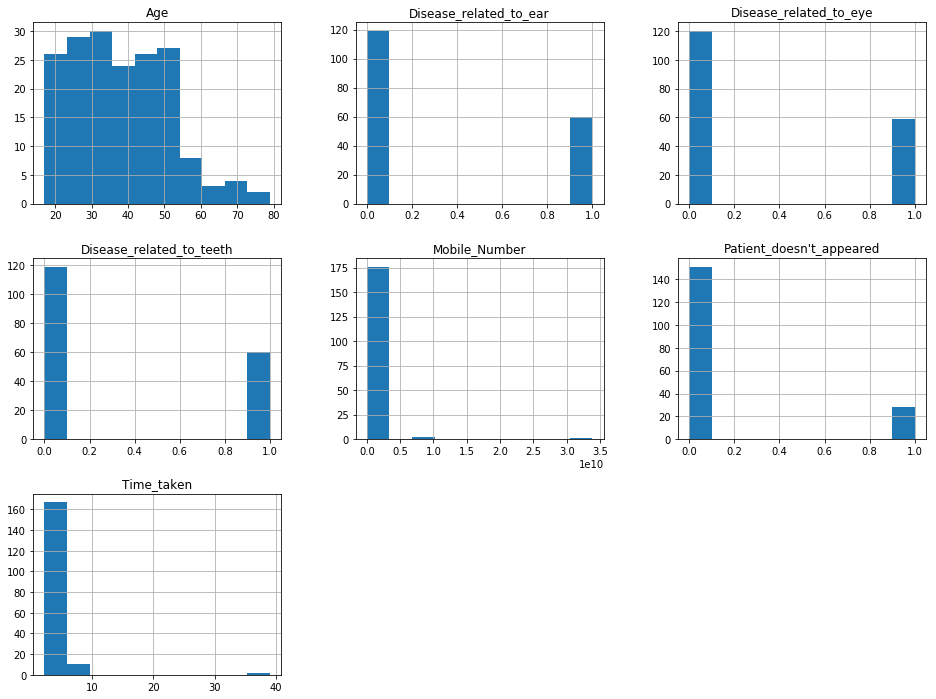

In [5]:
plt.rcParams['figure.figsize'] = (16,12)
df.drop(['Name'], axis = 1).hist()

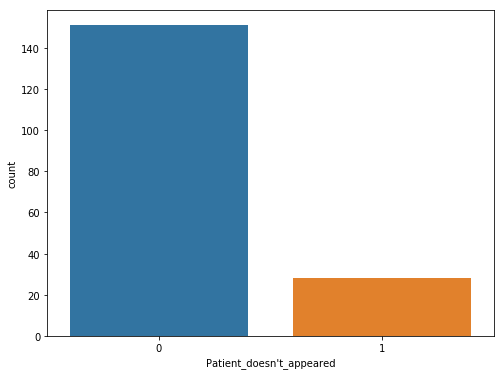

In [6]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = df["Patient_doesn't_appeared"], data = df)

In [7]:
#df["Patient_doesn't_appeared"].describe()
df["Time_taken"].describe()

count    179.000000
mean       4.555330
std        3.808568
min        2.210000
25%        3.400000
50%        4.100000
75%        4.700000
max       39.000000
Name: Time_taken, dtype: float64

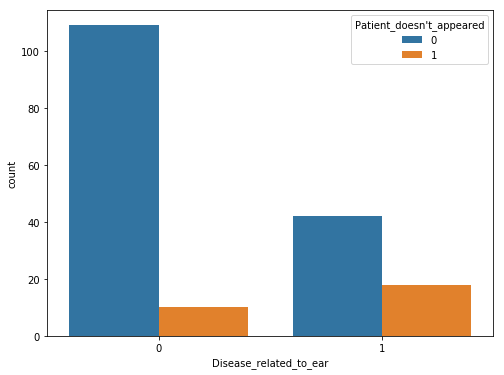

In [8]:
sns.countplot(x='Disease_related_to_ear', hue="Patient_doesn't_appeared", data=df);

In [9]:
df["Patient_doesn't_appeared"].value_counts()

0    151
1     28
Name: Patient_doesn't_appeared, dtype: int64

In [72]:
#0.1564 = 15.64% doesn't appear in opd

## Model creation using decision trees

In [10]:

#df["Patient_doesn't_appeared"] = df["Patient_doesn't_appeared"].astype('int')
names = df['Name']
mobile = df['Mobile_Number']
y = df["Patient_doesn't_appeared"]
df.drop(['Name','Mobile_Number',"Patient_doesn't_appeared"], axis=1, inplace=True)

In [11]:
#df.head()

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

### Machine Learning model's prediction

In [13]:
from sklearn.metrics import accuracy_score
from collections import Counter

tree_pred = tree.predict(X_holdout)
print(tree_pred)
print(Counter(tree_pred))
#accuracy_score(y_holdout, tree_pred) 


[0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
Counter({0: 47, 1: 7})


### Prediction for patients who will be absent is 7 and time is calculated based on the formed algorithm below

In [16]:
# Average time taken by any of the patient
#df["Time_taken"].describe() mean = 4.555330

# if seven people didn't appeared then updated time will be 

# time = time - 7*4.55533    ---- =====>>         (time = time - 31.88731)

#### we got the result that 7 patients out of 180 have chances to not appear in opd after booking , 
#### So with the help of this system we can predict the time of particular patient and we can inform them 
#### by messaging them 

## ALGORITHMS THAT GOVERNS WORKING OF THE SYSTEM

#### let the machine machine learning model gives prediction(No. of patents that will not appear on the date of appointment) equal to n1 and the average time taken be t-avg
#### le


## Whole Dataset Visualisation

In [5]:
df['International plan'] = df['International plan'].map({'Yes':1, 'No':0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
#df['Churn'] = df['Churn'].astype('int')  include this if there is an error in plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002605E5825F8>,
      dtype=object)

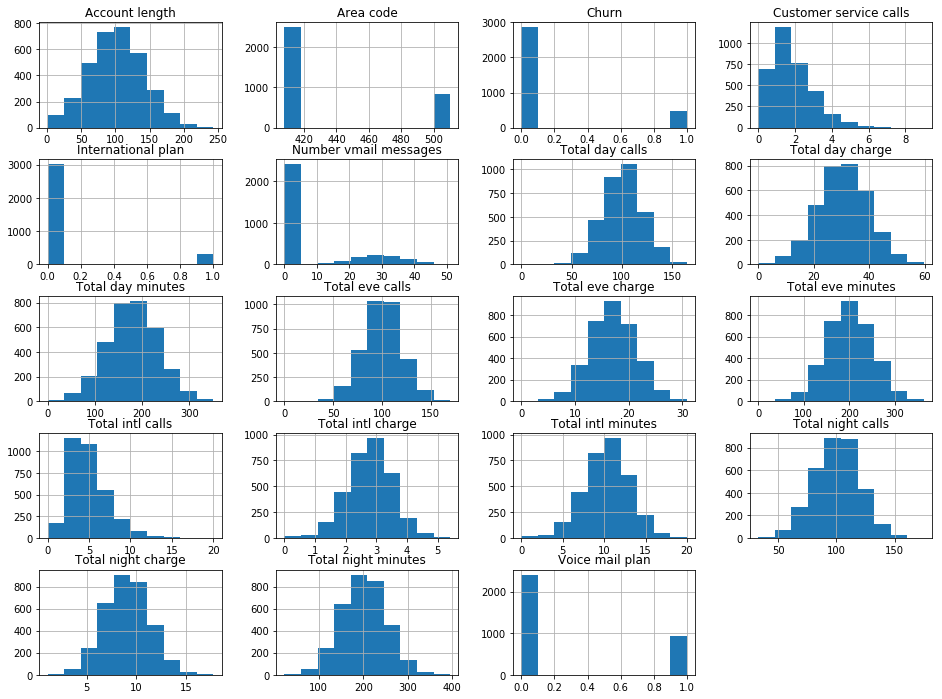

In [7]:
plt.rcParams['figure.figsize'] = (16,12)
df.drop(['State'], axis = 1).hist()

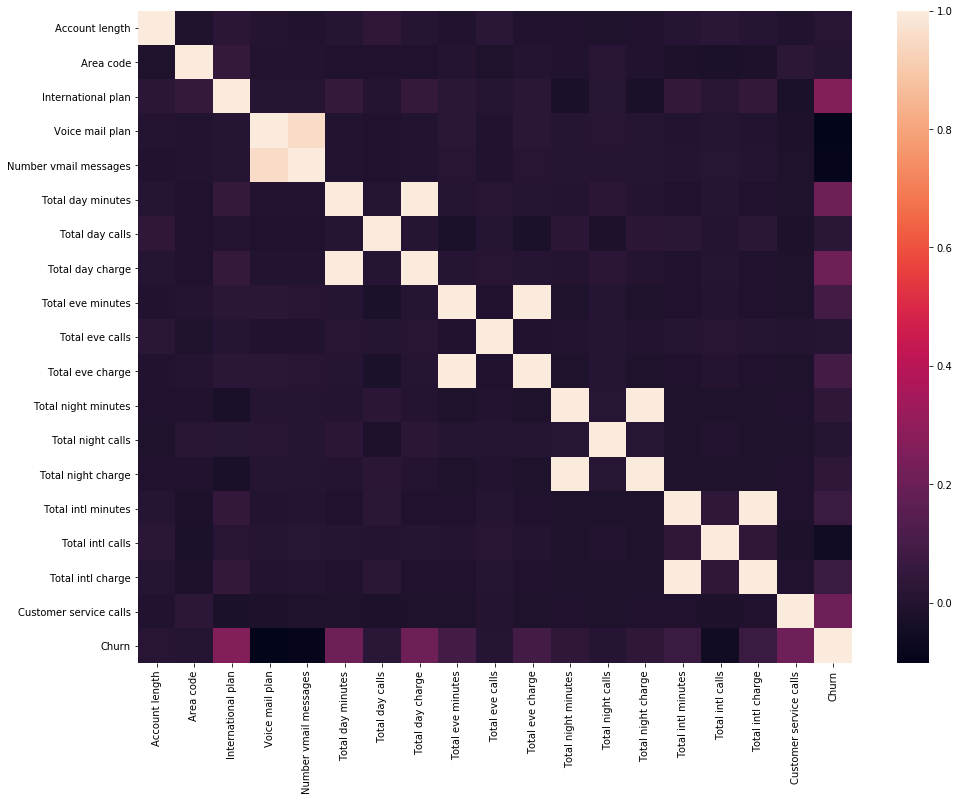

In [38]:
#df.corr()   # returns pearson correlation??
sns.heatmap(df.corr())

In [ ]:
# from above correlational, we got that some features are corelated eg. total minutes and charges etc.
#We have to remove these charges here( not required in R.F., DT, boostig etc)

In [8]:
[feat_name for feat_name in df.columns if 'charge'] 

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [9]:
df.drop([feat_name for feat_name in df.columns if 'charge' in feat_name], axis = 1 ).shape

(3333, 16)

In [46]:
df.shape
#original shape will remained same

(3333, 20)

In [10]:
# to modify the dataset
df.drop([feat_name for feat_name in df.columns if 'charge' in feat_name], axis = 1, inplace = True )

In [12]:
df.shape

(3333, 16)

In [16]:
state = df['State']
df.drop('State', axis = 1, inplace = True)

In [20]:
df.shape

(3333, 15)

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state =17)
X_repr = tsne.fit_transform(df)

In [72]:
# TSNE?

In [21]:
tsne = TSNE(random_state =17)

In [22]:
# %%time  this tells the time of process after execution
X_repr = tsne.fit_transform(df)

In [23]:
X_repr.shape

(3333, 2)

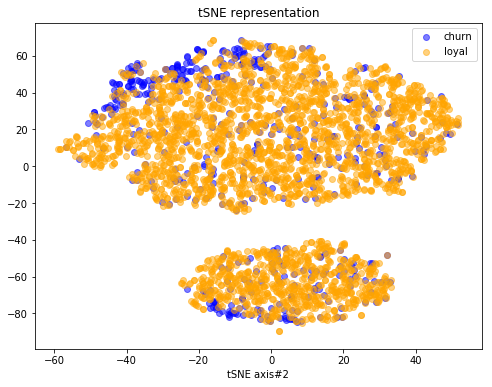

In [37]:
plt.rcParams['figure.figsize'] = (8,6)
#plt.scatter(X_repr[:,0], X_repr[:,1]);
plt.scatter(X_repr[df['Churn'] == 1,0],
            X_repr[df['Churn']==1,1], alpha=0.5, c = 'blue',
           label = 'churn');
plt.scatter(X_repr[df['Churn'] == 0,0],
            X_repr[df['Churn']==0,1], alpha =0.5, c = 'orange',
           label = 'loyal');
plt.xlabel('tSNE axis#1')
plt.xlabel('tSNE axis#2')
plt.legend()
plt.title('tSNE representation')
plt.savefig('churn_tsne.png', dip = 300);

In [ ]:
# <img src = 'churn_tsne.png'> to include the saved image 

<img src = 'churn_tsne.png'>

## Feature one at a time
### Numeric

In [49]:
df['Total day minutes'].describe()
sns.boxplot(x = df['Total day minutes'], data = df)

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

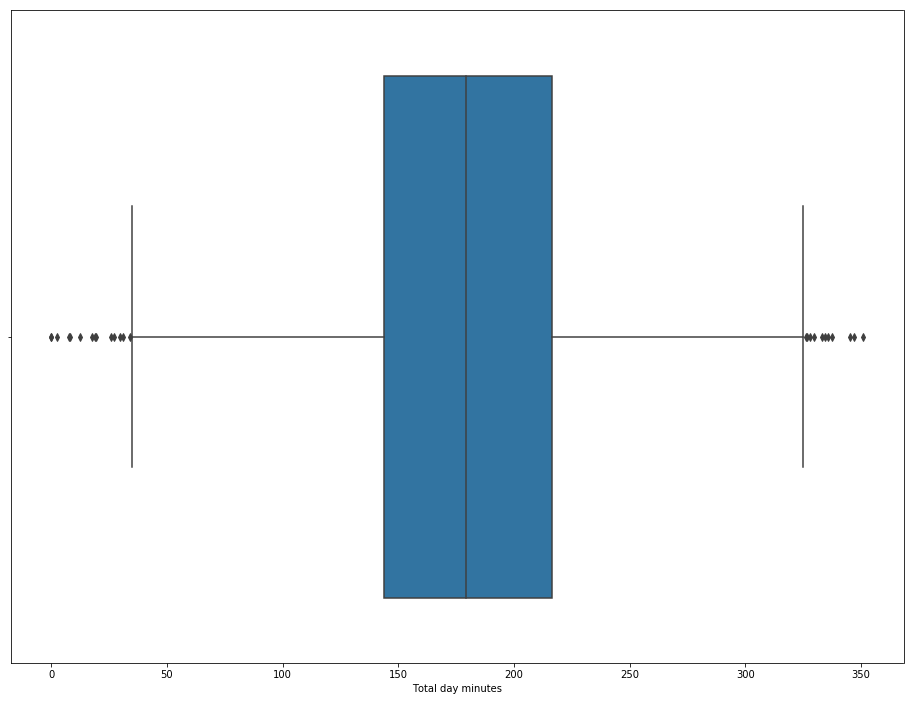

In [50]:
sns.boxplot(x = df['Total day minutes'], data = df)

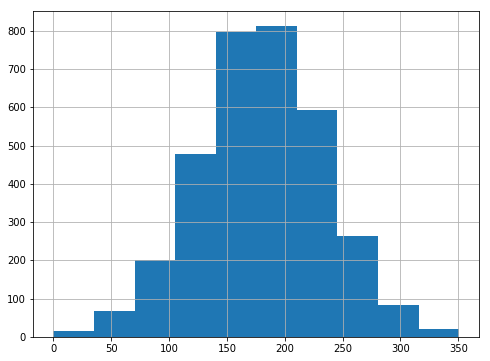

In [52]:
plt.rcParams['figure.figsize'] = (8,6)
df['Total day minutes'].hist()

## Categorical

In [53]:
df['State'].nunique()

51

In [55]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

In [58]:
df['Churn'].value_counts()
#To get percentage 
#df['Churn'].value_counts(normalize = True)

0    2850
1     483
Name: Churn, dtype: int64

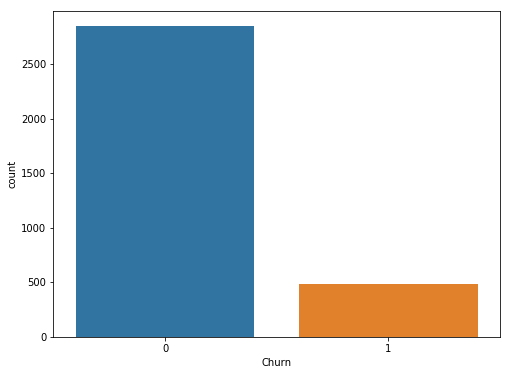

In [59]:
# above same can be built with sns
sns.countplot(x = df['Churn'], data = df)

##  Interaction between features
### Numeric to Numeric

In [62]:
df.corrwith(df['Total day minutes'])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

In [ ]:
### we are interested to find how two numneric features are distributed.
#### it is not reasonable to find b/w two features, one should be target that we are going to predict
#### as in linear regression target is numeric variable, this is a much better things to do
### but for here we are building scatter plot and other stuffs.

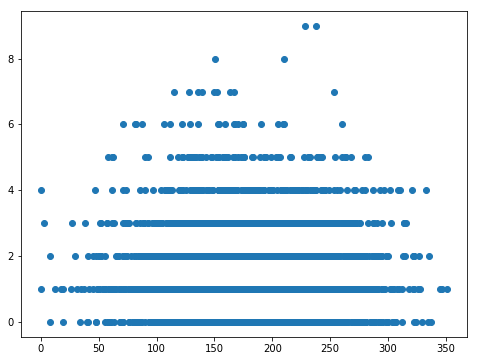

In [61]:
plt.scatter(df['Total day minutes'], df['Customer service calls'])
# x-axis = Total day minutes
# y axis = Customer service calls

## Catergoriacal - categorical

In [63]:
pd.crosstab(df['Churn'], df["Customer service calls"])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


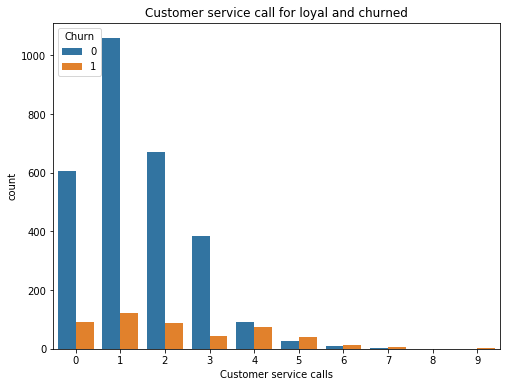

In [69]:
sns.countplot(x = df['Customer service calls'], hue = 'Churn', data = df);
plt.title("Customer service call for loyal and churned");

## Categorical - numerical

In [40]:
import numpy as np

In [38]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].mean()

,Total day minutes,Customer service calls
Churn,,
False,175.175754,1.449825
True,206.914079,2.229814


In [42]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg(np.median)

,Total day minutes,Customer service calls
Churn,,
False,177.2,1
True,217.6,2


In [44]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.median, np.mean])

Total day minutes             Customer service calls          
                 median        mean                 median      mean
Churn                                                               
False             177.2  175.175754                      1  1.449825
True              217.6  206.914079                      2  2.229814

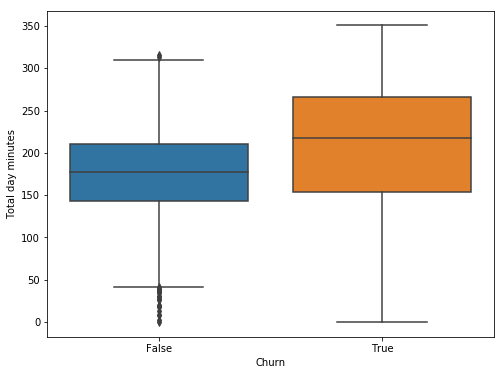

In [46]:
sns.boxplot(x = 'Churn', y = 'Total day minutes', data = df);